# COMMERCIAL REAL ESTATE - INVESTOR RECOMMENDER

### **PROBLEM STATEMENT:**


* Aiming to bridge a technological gap between Residential and Commercial Real Estate brokerage platform offerings, PROP/SWAP serves as a tool to recommend potential buyers for individual CRE properties, referencing a comprehensive international real estate investor pool to generate customized recommendations


## **BACKGROUND:**

* From the perspective of public and private investors, **Real Estate** is typically segmented across **Residential** and **Commercial** verticals.
* Unique sectors within each vertical are valued distinctly from one another. 
* Analysis evaluates the commercial RE sectors outlined below:

  * COMMERCIAL
    * Retail - Strip Centers / NNN Retail / Malls
    * Multifamily - Apartments
    * Office - Central Business District (CBD) / Suburban
    * Hospitality - Full-Service Hotels / Limited-Service Hotels
    * Self-Storage - Individual / Commercial
    * Industrial - Warehouse / Logistics

  * RESIDENTIAL
    * Single-Family Homes
    * Condo / Townhome / Duplex
    * Manufactured Housing 




* Comprehensive CRE transaction data is often difficult to attain. Public transaction records or financing documents tend to offer limited information, due to marginal reporting requirements as it pertains to property operations. Only a handful of sources provide reliable CRE transaction data, often protected behind lofty subscription paywalls.

* While many different valuation tools for residential real estate investors or homebuyers are readily available online (Zillow.com, Homesnap.com, Redfin.com), very few CRE parallels (even fewer without exorbitant fees) have emerged publicly, outside of applications offered by CoStar Group (LoopNet.com, TenX.com).

  * Inadvertantly (?) enables an unfair advantage for larger, well-capitalized institutional investors, while smaller investors are forced to either contract a broker, assume costs for subscription services, or move forward with incomplete data.


## DATA / SOURCES


* Real Capital Analytics (RCA)
  * https://www.rcanalytics.com/
* Green Street Advisors (GSA)
  * https://www.greenstreet.com/
* Moody’s Analytics (REIS)
  * https://www.reis.com/
* Yahoo Finance
  * https://finance.yahoo.com/
* Polygon
  * https://polygon.io/
* Deloitte
  * https://www2.deloitte.com/us/en/insights/industry/financial-services/commercial-real-estate-outlook.html



## IMPORTS DICTIONARY

  * INVESTOR INDEX - MULTIPLE SOURCES
  * Real Capital Analytics - Quarterly Real Estate Transaction Data (2001-2019)

# LIBRARY IMPORTS

In [94]:
## LIBRARY IMPORTS ##

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from scipy import stats as stats
import statistics
import datetime as dt

#import statsmodels.api as sm

In [126]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# DATA IMPORTS

## INVESTOR INDICES

In [105]:
### INVESTOR INDEX - SECTORS
all_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'INVESTORS', header = 0)
mf_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'MF', header = 0)
nnn_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'NNN', header = 0)
sc_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'SC', header = 0)
mall_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'MALL', header = 0)
ss_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'SS', header = 0)
ind_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'IND', header = 0)
fs_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'FS', header = 0)
ls_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'LS', header = 0)
cbd_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'CBD', header = 0)
sub_investor_idx = pd.read_excel('/drive/My Drive/Colab Notebooks/capstone/data/investors.xlsx', sheet_name = 'SUB', header = 0)

## REIT FINANCIALS

In [ ]:
# public REIT financial reporting data
reit_comps = pd.read_csv('/drive/My Drive/Colab Notebooks/capstone/data/reit_financials.csv', infer_datetime_format = True)

## REAL CAPITAL ANALYTICS (RCA)

In [9]:
# annual CRE acquisition volume, by sector (grouped)
rca_ann = pd.read_csv('/drive/My Drive/Colab Notebooks/capstone/data/all_sectors_python_ann.csv', infer_datetime_format = True, header = 0, index_col = 'Date')

# quarterly CRE acquisition volume, by sector (grouped)
rca_qtr = pd.read_csv('/drive/My Drive/Colab Notebooks/capstone/data/all_sectors_python_qtr.csv', infer_datetime_format = True, header = 0, index_col = 'Date')

# ANALYSIS PARAMETERS

## VARIABLE ASSIGNMENT

In [15]:
## VARIABLE ASSIGNMENT - SECTOR DATAFRAMES
mf_num_cols = mf_investor_idx[['TTL_SECT','TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                               'MF_VOL', 'MF_PROPS','MF_UNITS', 'MF_UNITS_PROP', 'MF_AVG_PRICE', 'MF_AVG_PPU',
                               'QUALITY','VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

sc_num_cols = sc_investor_idx[['TTL_SECT', 'TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                               'SC_VOL', 'SC_PROPS', 'SC_SF', 'SC_SF_PROP', 'SC_AVG_PRICE', 'SC_AVG_PSF',
                               'QUALITY', 'VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

nnn_num_cols = nnn_investor_idx[['TTL_SECT','TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                                 'NNN_VOL', 'NNN_PROPS', 'NNN_SF', 'NNN_SF_PROP', 'NNN_AVG_PRICE', 'NNN_AVG_PSF',
                                 'QUALITY', 'VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

mall_num_cols = mall_investor_idx[['TTL_SECT', 'TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                                   'MALL_VOL', 'MALL_PROPS', 'MALL_SF', 'MALL_SF_PROP', 'MALL_AVG_PRICE', 'MALL_AVG_PSF',
                                   'QUALITY', 'VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

ss_num_cols = ss_investor_idx[['TTL_SECT', 'TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                               'SS_VOL', 'SS_PROPS', 'SS_SF', 'SS_SF_PROP', 'SS_AVG_PRICE', 'SS_AVG_PSF',
                               'QUALITY', 'VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

ind_num_cols = ind_investor_idx[['TTL_SECT', 'TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                                 'IND_VOL', 'IND_PROPS', 'IND_SF', 'IND_SF_PROP', 'IND_AVG_PRICE', 'IND_AVG_PSF',
                                 'QUALITY', 'VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

fs_num_cols = fs_investor_idx[['TTL_SECT', 'TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                               'FS_VOL', 'FS_PROPS', 'FS_KEYS', 'FS_KEYS_PROP', 'FS_AVG_PRICE', 'FS_AVG_PPK',
                               'QUALITY', 'VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

ls_num_cols = ls_investor_idx[['TTL_SECT', 'TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                               'LS_VOL', 'LS_PROPS', 'LS_KEYS', 'LS_KEYS_PROP', 'LS_AVG_PRICE', 'LS_AVG_PPK',
                               'QUALITY', 'VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

cbd_num_cols = cbd_investor_idx[['TTL_SECT', 'TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                                 'CBD_VOL', 'CBD_PROPS', 'CBD_SF', 'CBD_SF_PROP', 'CBD_AVG_PRICE', 'CBD_AVG_PSF',
                                 'QUALITY', 'VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

sub_num_cols = sub_investor_idx[['TTL_SECT', 'TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE',
                                 'SUB_VOL', 'SUB_PROPS', 'SUB_SF', 'SUB_SF_PROP', 'SUB_AVG_PRICE', 'SUB_AVG_PSF',
                                 'QUALITY', 'VOL_RANK', 'PRICE_UNIT_RANK', 'UNIT_RANK']]

master_num_cols = all_investor_idx[['TTL_SECT', 'MF_SECT', 'SC_SECT', 'NNN_SECT', 'MALL_SECT',
       'SS_SECT', 'IND_SECT', 'FS_SECT', 'LS_SECT', 'CBD_SECT', 'SUB_SECT',
       'TTL_VOL', 'TTL_PROPS', 'TTL_AVG_PRICE', 'RET_VOL', 'RET_PROPS',
       'RET_AVG_PRICE', 'RET_AVG_PSF', 'OFF_VOL', 'OFF_PROPS', 'OFF_AVG_PRICE',
       'OFF_AVG_PSF', 'TTL_SF', 'RET_SF', 'OFF_SF', 'SS_IND_SF', 'HOT_VOL',
       'HOT_KEYS', 'MF_VOL', 'SC_VOL', 'NNN_VOL', 'MALL_VOL', 'SS_VOL',
       'IND_VOL', 'FS_VOL', 'LS_VOL', 'CBD_VOL', 'SUB_VOL', 'MF_PROPS',
       'SC_PROPS', 'NNN_PROPS', 'MALL_PROPS', 'SS_PROPS', 'IND_PROPS',
       'FS_PROPS', 'LS_PROPS', 'CBD_PROPS', 'SUB_PROPS', 'MF_UNITS', 'SC_SF',
       'NNN_SF', 'MALL_SF', 'SS_SF', 'IND_SF', 'FS_KEYS', 'LS_KEYS', 'CBD_SF',
       'SUB_SF', 'MF_AVG_PRICE', 'SC_AVG_PRICE', 'NNN_AVG_PRICE',
       'MALL_AVG_PRICE', 'SS_AVG_PRICE', 'IND_AVG_PRICE', 'FS_AVG_PRICE',
       'LS_AVG_PRICE', 'CBD_AVG_PRICE', 'SUB_AVG_PRICE', 'MF_AVG_PPU',
       'SC_AVG_PSF', 'NNN_AVG_PSF', 'MALL_AVG_PSF', 'SS_AVG_PSF',
       'IND_AVG_PSF', 'FS_AVG_PPK', 'LS_AVG_PPK', 'CBD_AVG_PSF', 'SUB_AVG_PSF',
       'MF_QUALITY', 'SC_QUALITY', 'NNN_QUALITY', 'MALL_QUALITY', 'SS_QUALITY',
       'IND_QUALITY', 'FS_QUALITY', 'LS_QUALITY', 'CBD_QUALITY', 'SUB_QUALITY',
       ]]

sect_qual_scores = all_investor_idx[['INVESTOR', 'INV_TYPE', 'CITY', 'STATE', 'COUNTRY', 'MSA', 'WEBSITE',
       'C_SUITE', 'MF_QUALITY', 'SC_QUALITY', 'NNN_QUALITY', 'MALL_QUALITY', 'SS_QUALITY',
       'IND_QUALITY', 'FS_QUALITY', 'LS_QUALITY', 'CBD_QUALITY', 'SUB_QUALITY']]

sect_qual_scores_df = sect_qual_scores.describe().T
sect_qual_scores_df.drop(columns = ['count', 'std'], inplace = True)

sectors = [mf_num_cols, sc_num_cols, nnn_num_cols, mall_num_cols, 
           ss_num_cols, ind_num_cols, fs_num_cols, ls_num_cols,
           cbd_num_cols, sub_num_cols]

qual_sort_bar = pd.DataFrame(all_investor_idx, columns=['INV_TYPE', 'AVG_QUALITY'])
qual_sort_bar.sort_values(by = 'AVG_QUALITY', ascending = False)

newline = '\n'

In [144]:
## RCA SECTOR - VARIABLE GROUPINGS
rca_ann_acq = pd.DataFrame(data = rca_ann, index = rca_ann.index, columns = ['Sector', 'International_Acq', 'Institutional_Fund_Acq', 'Public_REIT_Acq', 'Private_Acq', 'Other_Acq', 'Undisclosed_Acq'])

rca_ann_acq_off = pd.DataFrame(data = rca_ann[rca_ann['Sector'] == "OFFICE"], index = rca_ann.index, columns = ['Sector', 'Year', 'International_Acq', 'Institutional_Fund_Acq', 'Public_REIT_Acq', 'Private_Acq', 'Other_Acq', 'Undisclosed_Acq'])
rca_ann_acq_off = rca_ann_acq_off[:18]

rca_ann_acq_ret = pd.DataFrame(data = rca_ann[rca_ann['Sector'] == "RETAIL"], index = rca_ann.index, columns = ['Sector',  'Year', 'International_Acq', 'Institutional_Fund_Acq', 'Public_REIT_Acq', 'Private_Acq', 'Other_Acq', 'Undisclosed_Acq'])
rca_ann_acq_ret = rca_ann_acq_ret[:18]

rca_ann_acq_mf = pd.DataFrame(data = rca_ann[rca_ann['Sector'] == "MULTIFAMILY"], index = rca_ann.index, columns = ['Sector',  'Year', 'International_Acq', 'Institutional_Fund_Acq', 'Public_REIT_Acq', 'Private_Acq', 'Other_Acq', 'Undisclosed_Acq'])
rca_ann_acq_mf = rca_ann_acq_mf[:18]

rca_ann_acq_ind = pd.DataFrame(data = rca_ann[rca_ann['Sector'] == "INDUSTRIAL"], index = rca_ann.index, columns = ['Sector',  'Year', 'International_Acq', 'Institutional_Fund_Acq', 'Public_REIT_Acq', 'Private_Acq', 'Other_Acq', 'Undisclosed_Acq'])
rca_ann_acq_ind = rca_ann_acq_ind[:18]

rca_ann_acq_hot = pd.DataFrame(data = rca_ann[rca_ann['Sector'] == "HOTEL"], index = rca_ann.index, columns = ['Sector',  'Year', 'International_Acq', 'Institutional_Fund_Acq', 'Public_REIT_Acq', 'Private_Acq', 'Other_Acq', 'Undisclosed_Acq'])
rca_ann_acq_hot = rca_ann_acq_hot[4:18]

mf_acq_ann = rca_ann[rca_ann['Sector'] == 'RETAIL']
ret_acq_ann = rca_ann[rca_ann['Sector'] == 'INDUSTRIAL']
ind_acq_ann = rca_ann[rca_ann['Sector'] == 'MULTIFAMILY']
hot_acq_ann = rca_ann[rca_ann['Sector'] == 'HOTEL']
off_acq_ann = rca_ann[rca_ann['Sector'] == 'OFFICE']

priv_acq_ann = rca_ann['Private_Acq']
pub_reit_acq_ann = rca_ann['Public_REIT_Acq']
intl_acq_ann = rca_ann['International_Acq']
inst_fund_acq_ann = rca_ann['Institutional_Fund_Acq']
oth_acq_ann = rca_ann['Other_Acq']
und_acq_ann = rca_ann['Undisclosed_Acq']

In [ ]:
sector_props = all_investor_idx[['INVESTOR', 'INV_TYPE', 'CITY', 'STATE', 'COUNTRY', 'MSA',
                              'MF_PROPS', 'SC_PROPS', 'NNN_PROPS', 'MALL_PROPS', 'SS_PROPS',
                               'FS_PROPS', 'LS_PROPS', 'IND_PROPS', 'CBD_PROPS', 'SUB_PROPS']]

sector_vol = all_investor_idx[['INVESTOR', 'INV_TYPE', 'CITY', 'STATE', 'COUNTRY', 'MSA',
                               'MF_VOL', 'SC_VOL', 'NNN_VOL', 'MALL_VOL', 'SS_VOL',
                                'FS_VOL', 'LS_VOL', 'IND_VOL', 'CBD_VOL', 'SUB_VOL']]

sector_avg_price = all_investor_idx[['INVESTOR', 'INV_TYPE', 'CITY', 'STATE', 'COUNTRY', 'MSA',
                                     'MF_AVG_PRICE', 'SC_AVG_PRICE', 'NNN_AVG_PRICE', 'MALL_AVG_PRICE', 'SS_AVG_PRICE',
                                     'FS_AVG_PRICE', 'LS_AVG_PRICE', 'IND_AVG_PRICE', 'CBD_AVG_PRICE', 'SUB_AVG_PRICE']]

sector_avg_price = all_investor_idx[['INVESTOR', 'INV_TYPE', 'CITY', 'STATE', 'COUNTRY', 'MSA',
                                     'MF_AVG_PRICE', 'SC_AVG_PRICE', 'NNN_AVG_PRICE', 'MALL_AVG_PRICE', 'SS_AVG_PRICE',
                                     'FS_AVG_PRICE', 'LS_AVG_PRICE', 'IND_AVG_PRICE', 'CBD_AVG_PRICE', 'SUB_AVG_PRICE']]

sector_qual_score = all_investor_idx[['INVESTOR', 'INV_TYPE', 'CITY', 'STATE', 'COUNTRY', 'MSA',
                                     'MF_QUALITY', 'SC_QUALITY', 'NNN_QUALITY', 'MALL_QUALITY', 'SS_QUALITY',
                                     'IND_QUALITY', 'FS_QUALITY', 'LS_QUALITY', 'CBD_QUALITY', 'SUB_QUALITY']]

sector_psf_score = all_investor_idx[['INVESTOR', 'INV_TYPE', 'CITY', 'STATE', 'COUNTRY', 'MSA',

# VISUALIZATIONS

### LINEPLOTS

No handles with labels found to put in legend.


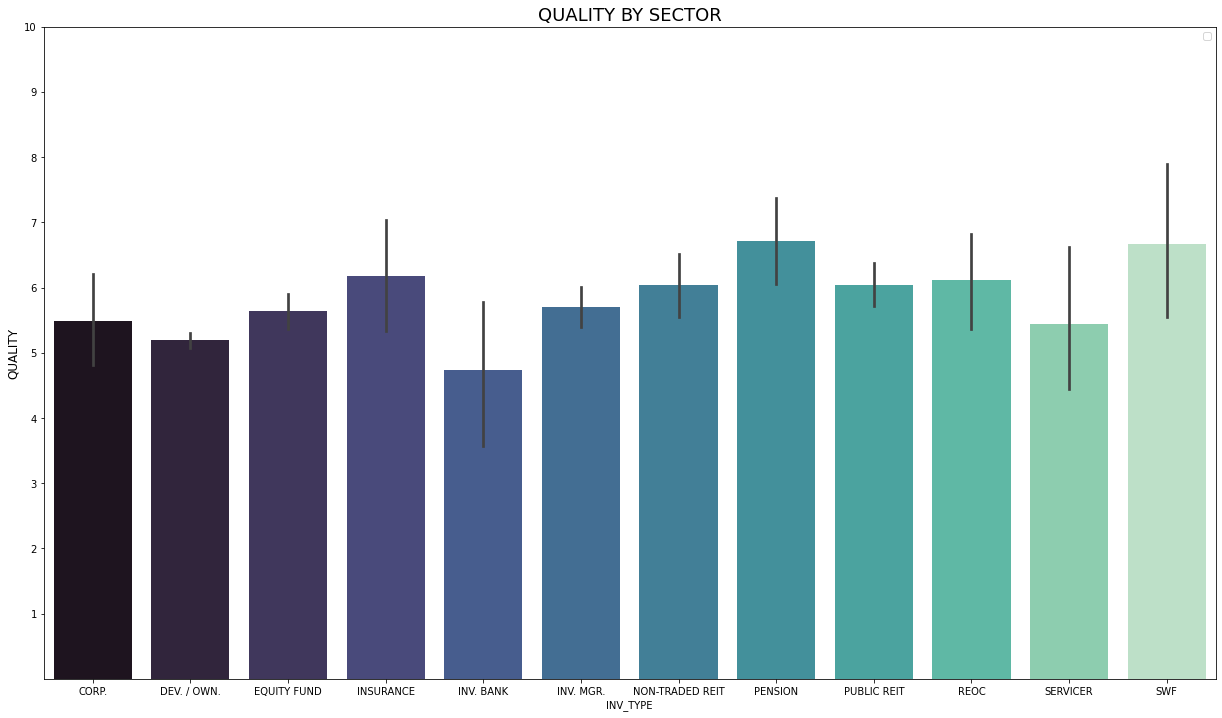

In [125]:
## INV_TYPE BARPLOTS - QUALITY
plt.figure(figsize = (21, 12))

sns.barplot(data = qual_sort_bar, x = 'INV_TYPE', y = 'AVG_QUALITY', palette = "mako")

plt.title('QUALITY BY SECTOR', fontsize = 18)
plt.ylabel('QUALITY', fontsize = 12)
plt.yticks(range(1,11,1))
plt.legend(loc = "best")
plt.savefig('/drive/My Drive/Colab Notebooks/project05_data/images/qual_by_sector.png');

* Price / Unit is often viewed as a proxy for asset / property quality
  * Mapping 'QUALITY' scores using weighted Sales Per Unit, which will be applied as target variable while training individual sector models later in analysis (MODEL notebook)
* Compare Price / Unit to Quality line plot weights to 
* Seeking a normalized distribution in order to ensure accurate, consistent, streamlined recommendations

No handles with labels found to put in legend.


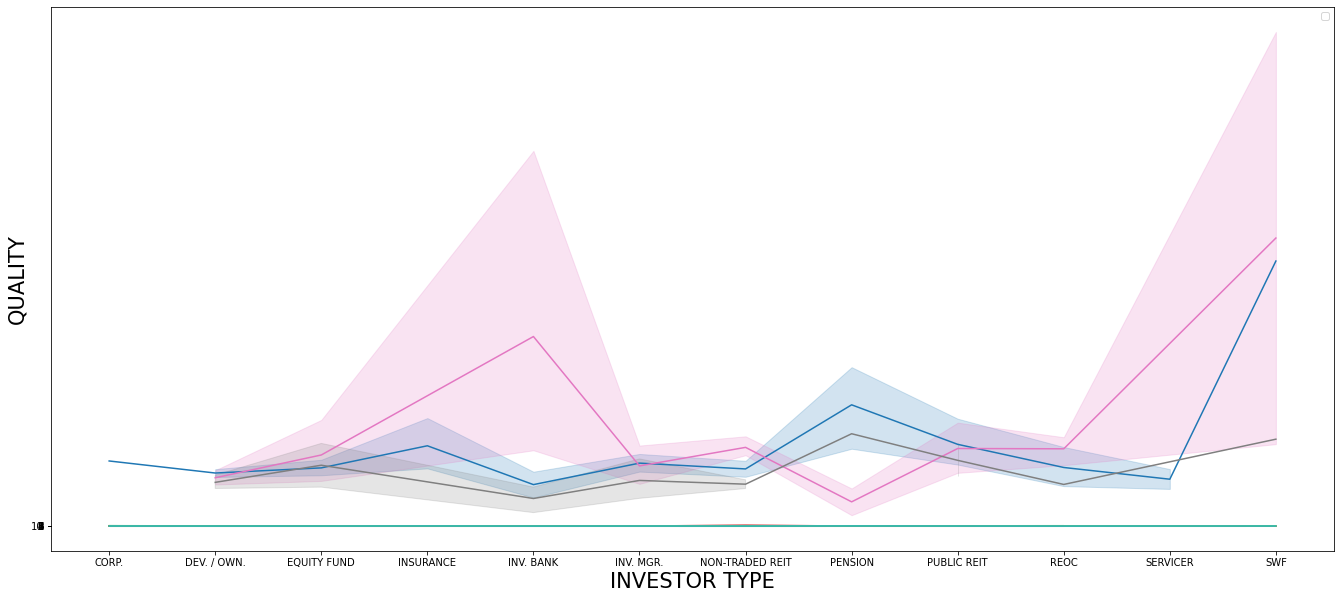

In [139]:
## INV_TYPE BOXPLOTS BY SECTOR
plt.figure(figsize = (23, 10))

#sect_qual_scores_sort = all_investor_idx.sort_values(by = '')

## MULTIFAMILY

sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'MF_AVG_PPU', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'SC_AVG_PSF', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'NNN_AVG_PSF', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'MALL_AVG_PSF', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'SS_AVG_PSF', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'IND_AVG_PSF', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'FS_AVG_PPK', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'LS_AVG_PPK', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'CBD_AVG_PSF', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'SUB_AVG_PSF', palette = "mako")

#plt.title('QUALITY BY SECTOR', fontsize = 18)
plt.xlabel('INVESTOR TYPE', fontsize = 21)
plt.ylabel('QUALITY', fontsize = 21)
plt.yticks(range(1,11,1))
plt.legend(loc = "best")
plt.savefig('/drive/My Drive/Colab Notebooks/capstone/images/per_unit_by_sector.png');

No handles with labels found to put in legend.


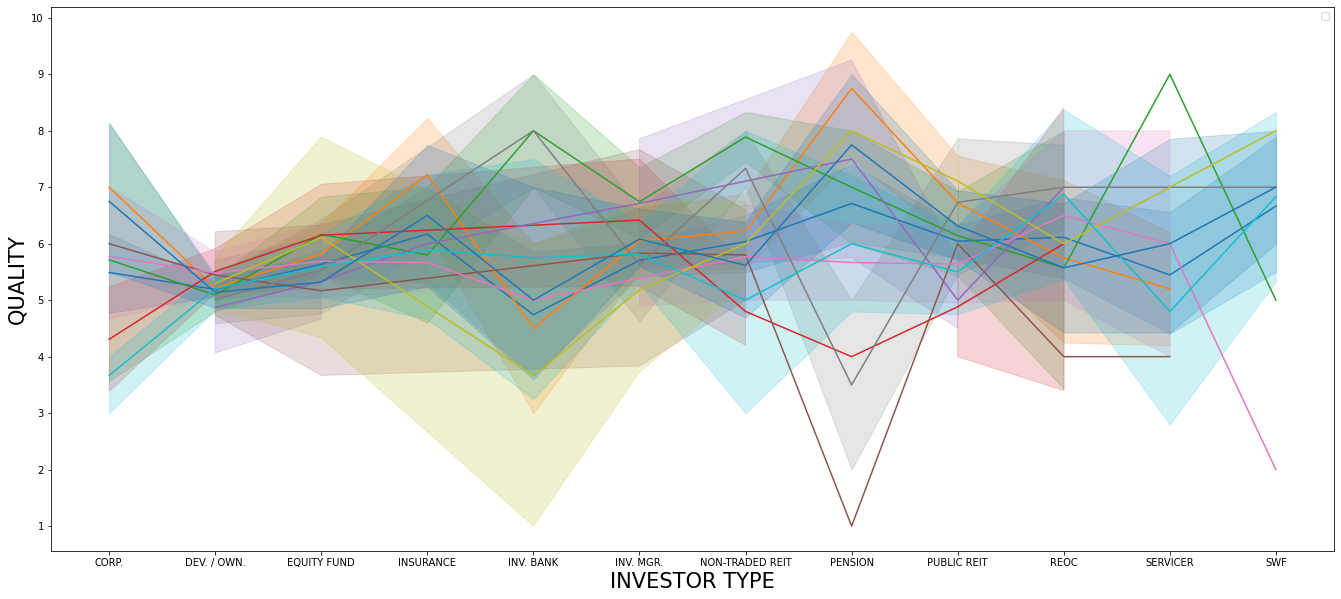

In [137]:
## INV_TYPE BOXPLOTS BY SECTOR
plt.figure(figsize = (23, 10))

#sect_qual_scores_sort = all_investor_idx.sort_values(by = '')

## MULTIFAMILY

sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'AVG_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'MF_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'SC_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'NNN_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'MALL_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'SS_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'IND_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'FS_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'LS_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'CBD_QUALITY', palette = "mako")
sns.lineplot(data = all_investor_idx, x = 'INV_TYPE', y = 'SUB_QUALITY', palette = "mako")

#plt.title('QUALITY BY SECTOR', fontsize = 18)
plt.xlabel('INVESTOR TYPE', fontsize = 21)
plt.ylabel('QUALITY', fontsize = 21)
plt.yticks(range(1,11,1))
plt.legend(loc = "best")
plt.savefig('/drive/My Drive/Colab Notebooks/capstone/images/qual_by_sector.png');

### BOXPLOTS

* Generating Boxplots below to assess overall data distribution and identify potential outliers
  * Highly iterative process throughout research process; investors were added, dropped, filtered, modified in order to best smooth calculated 'QUALITY' distribution
  * Evaluating by Sector, Investor Type, and Investor cross-slices, affirmative data indicates clear trends between asset classes, and within asset classes as well.
  * Grouping investors by investor type seems to offer very clear variances in pricing

### BARPLOTS

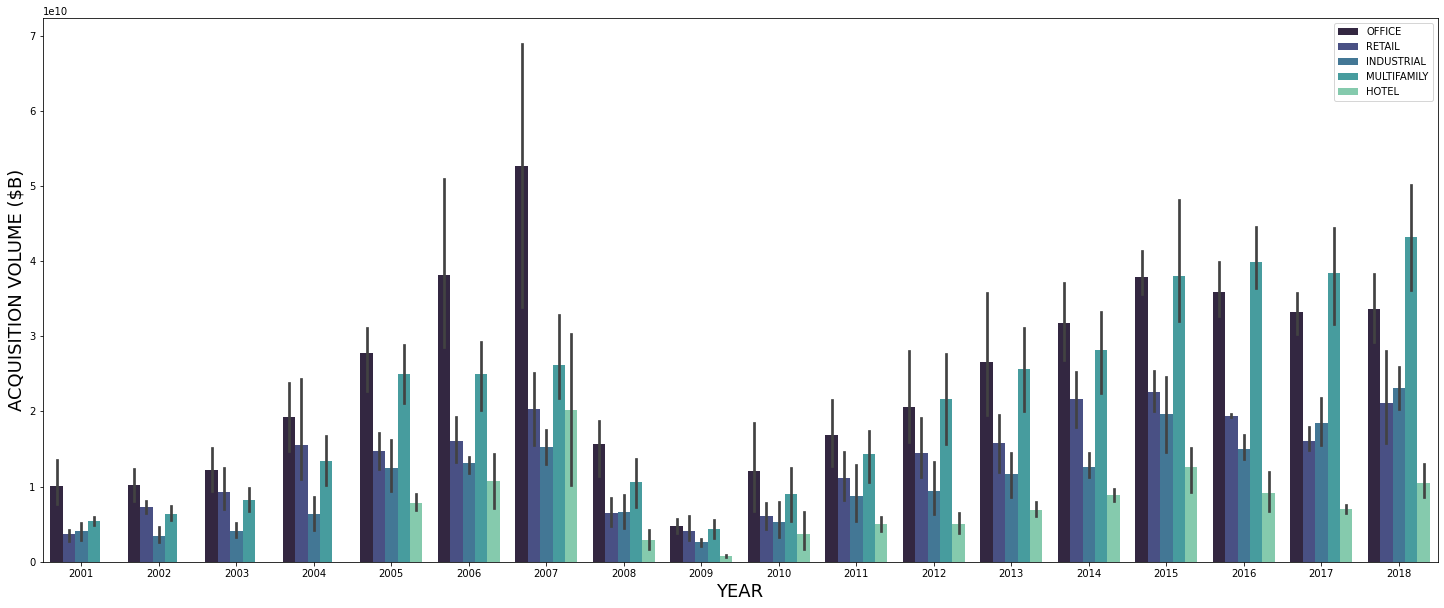

In [142]:
#plt.figure(figsize=(15,15))
plt.figure(figsize=(25,10))

sns.barplot(data=rca_qtr, x='Year', y='Total_Acq', hue = 'Sector', palette = "mako")
#plt.title('ACQUISITION VOLUME BY SECTOR ($B)', fontsize = 24)
plt.xlabel('YEAR', fontsize = 18)
plt.ylabel('ACQUISITION VOLUME ($B)', fontsize = 18)
plt.legend(loc = "best")
plt.savefig('/drive/My Drive/Colab Notebooks/capstone/images/total_acq_sector.png');

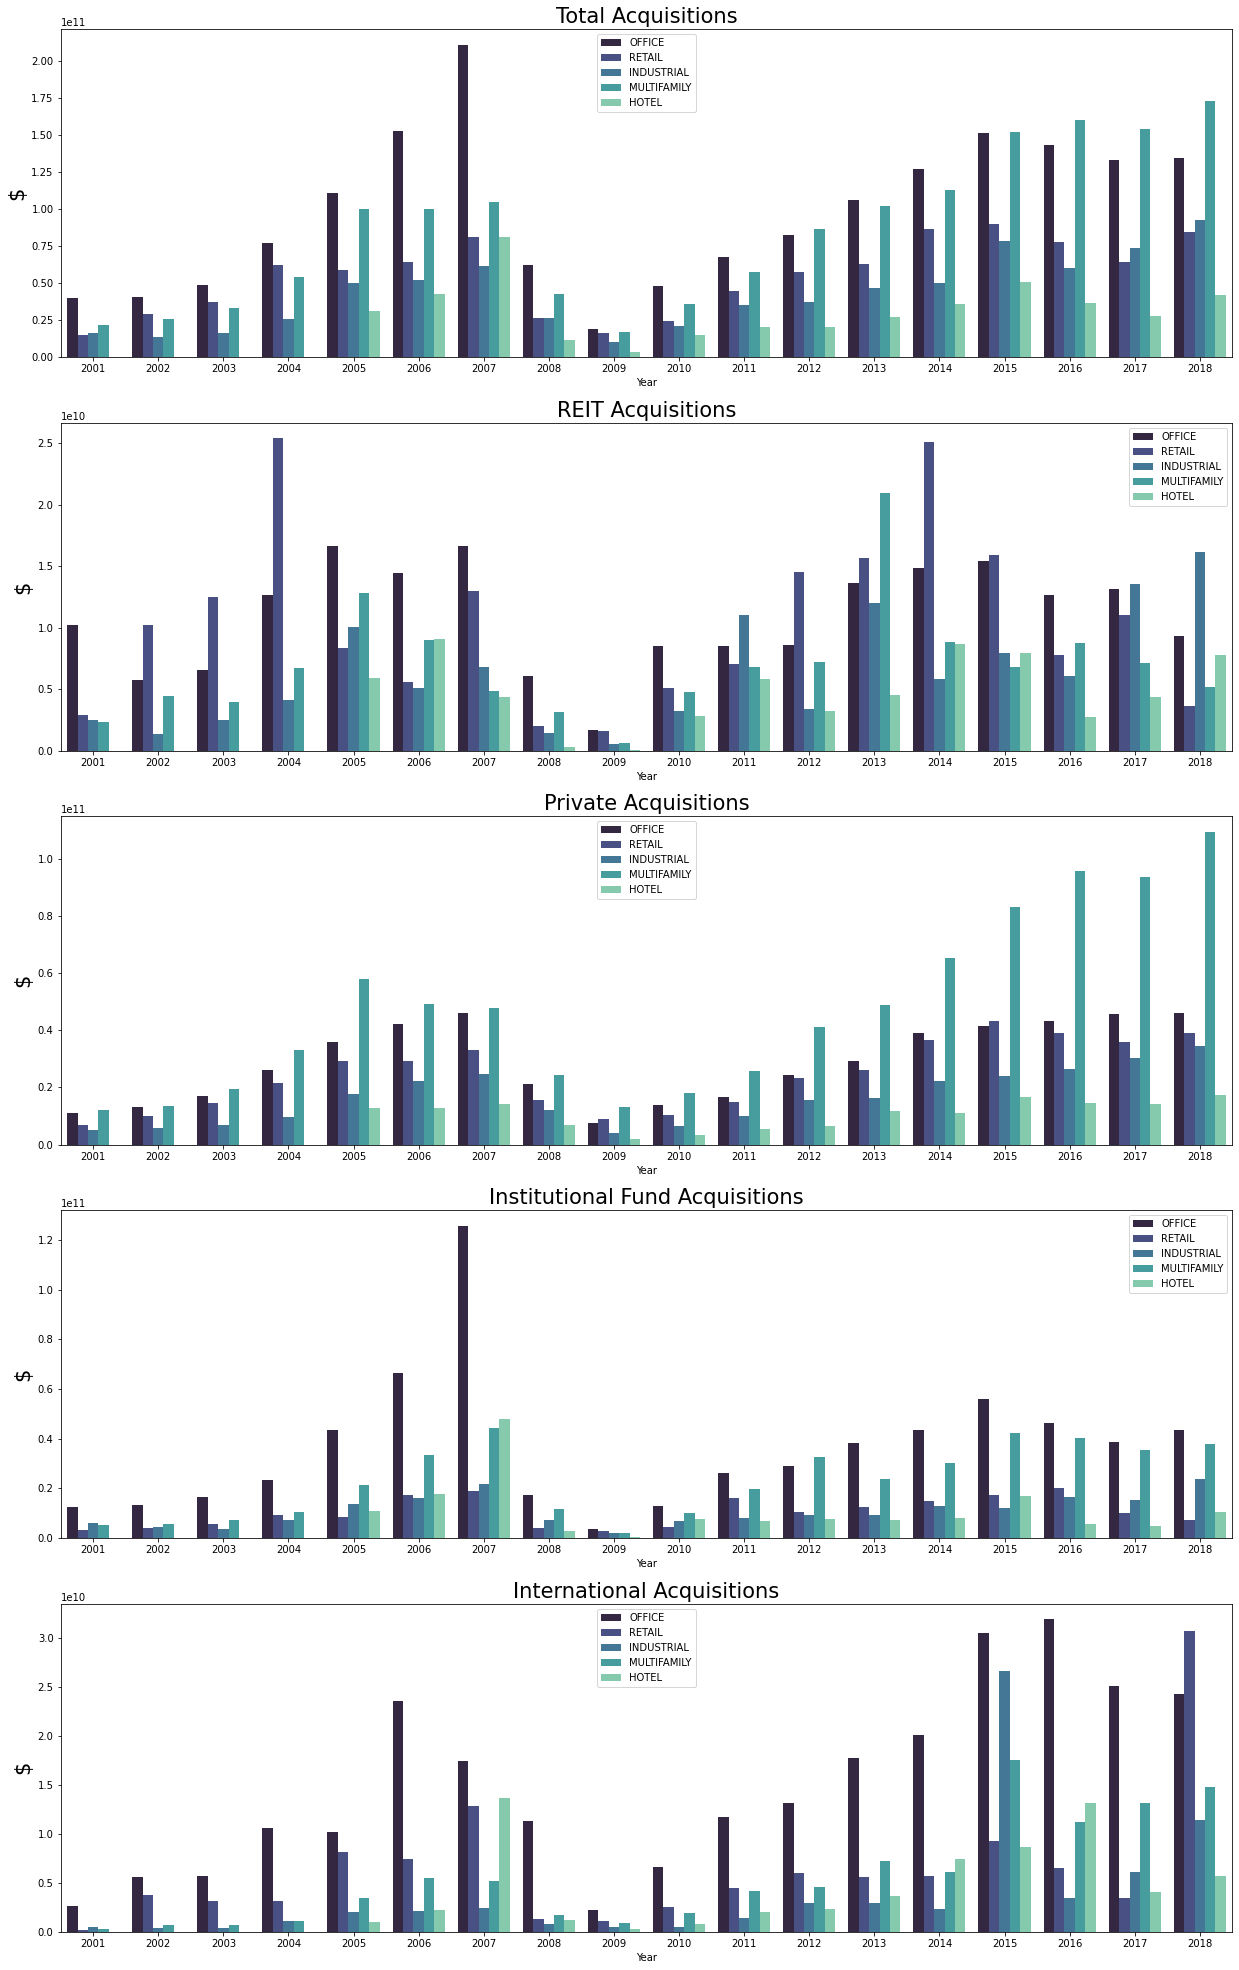

In [91]:
plt.figure(figsize=(21,35))

ax1 = plt.subplot(511)
sns.barplot(data=rca_ann, x='Year', y='Total_Acq', hue = 'Sector', palette = "mako")
plt.title('Total Acquisitions', fontsize = 21)
#plt.xlabel('Real Estate Sector', fontsize = 21)
plt.ylabel('$', fontsize = 21)
plt.legend(loc = "best")

ax2 = plt.subplot(512)
sns.barplot(data=rca_ann, x='Year', y='Public_REIT_Acq', hue = 'Sector', palette = "mako")
plt.title('REIT Acquisitions', fontsize = 21)
plt.ylabel('$', fontsize = 21)
plt.legend(loc = "best")

ax3 = plt.subplot(513)
sns.barplot(data=rca_ann, x='Year', y='Private_Acq', hue = 'Sector', palette = "mako")
plt.title('Private Acquisitions', fontsize = 21)
plt.ylabel('$', fontsize = 21)
plt.legend(loc = "best")

ax4 = plt.subplot(514)
sns.barplot(data=rca_ann, x='Year', y='Institutional_Fund_Acq', hue = 'Sector', palette = "mako")
plt.title('Institutional Fund Acquisitions', fontsize = 21)
plt.ylabel('$', fontsize = 21)
plt.legend(loc = "best")

ax5 = plt.subplot(515)
sns.barplot(data=rca_ann, x='Year', y='International_Acq', hue = 'Sector', palette = "mako")
plt.title('International Acquisitions', fontsize = 21)
plt.ylabel('$', fontsize = 21)
plt.legend(loc = "best");

### CORRELATIONS

* Generating Heatmap Correlation charts to hone in on feature extraction for model pre-processing 

In [ ]:
# create correlation variable relative to rest of DataFrame
plt.figure(figsize=(15,25))
mf_quality_corr = all_investor_idx.corr()[['MF_QUALITY']].sort_values(by = 'MF_QUALITY', ascending = False)

# create heatmap to visualize correlation variable
sns.heatmap(mf_quality_corr, annot = True, cmap = 'mako', vmin=-1, vmax=1, linecolor = 'white', linewidth = .015)
plt.title('MF QUALITY', fontsize = 24);
#plt.savefig('/drive/My Drive/Colab Notebooks/project05_data/images/vol_qtr_corr.png');

### INSTITUTIONAL OWNERSHIP

* Briefly assessing institutional shareholders data to examine whether any funds or banks have taken outsized positions in sectors / tickers of interest
  * Studying institutional ownership helps to pin down certain stocks or sectors ........ 

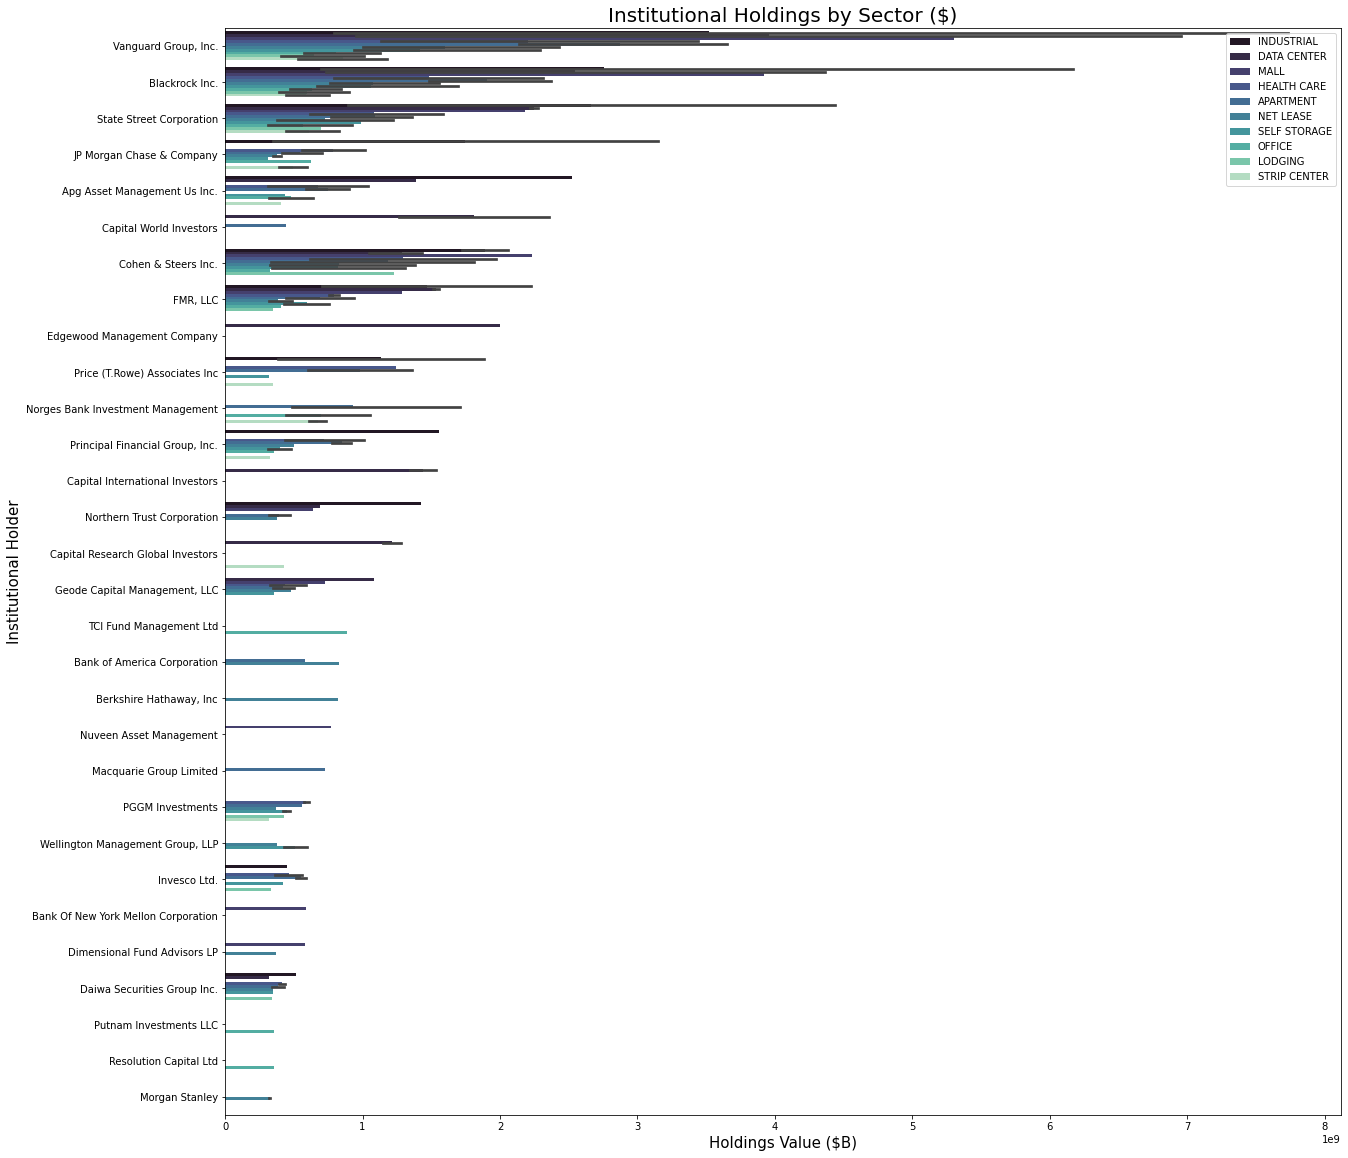

In [ ]:
plt.figure(figsize=(20,20))
#top_50_holders = top_50_holders.sort_values(by = "Value", ascending = False)
top_50_holders = holders_data.sort_values(by = "Value", ascending = False)[:300]
sns.barplot(data=top_50_holders, x='Value', y='Holder', hue = 'Sector', palette = "mako", linewidth = 2)
plt.title('Institutional Holdings by Sector ($)', fontsize = 20)
plt.xlabel('Holdings Value ($B)', fontsize = 15)
plt.ylabel('Institutional Holder', fontsize = 15)
plt.legend(loc = "best")
plt.savefig('/drive/My Drive/Colab Notebooks/project05_data/images/top_50_holders.png')

### INVESTORS

In [25]:
all_investor_idx.describe()

,TTL_SECT,MF_SECT,SC_SECT,NNN_SECT,MALL_SECT,SS_SECT,IND_SECT,FS_SECT,LS_SECT,CBD_SECT,SUB_SECT,TTL_VOL,TTL_PROPS,TTL_AVG_PRICE,RET_VOL,RET_PROPS,RET_AVG_PRICE,RET_AVG_PSF,OFF_VOL,OFF_PROPS,OFF_AVG_PRICE,OFF_AVG_PSF,TTL_SF,RET_SF,OFF_SF,SS_IND_SF,HOT_VOL,HOT_KEYS,MF_VOL,SC_VOL,NNN_VOL,MALL_VOL,SS_VOL,IND_VOL,FS_VOL,LS_VOL,CBD_VOL,SUB_VOL,MF_PROPS,SC_PROPS,...,MF_PCT_MF,SC_PCT_SC,NNN_PCT_NNN,MALL_PCT_MALL,SS_PCT_SS,IND_PCT_IND,FS_PCT_FS,LS_PCT_LS,CBD_PCT_CBD,SUB_PCT_SUB,MF_VOL_RANK,SC_VOL_RANK,NNN_VOL_RANK,MALL_VOL_RANK,SS_VOL_RANK,IND_VOL_RANK,FS_VOL_RANK,LS_VOL_RANK,CBD_VOL_RANK,SUB_VOL_RANK,MF_UNIT_RANK,SC_UNIT_RANK,NNN_UNIT_RANK,MALL_UNIT_RANK,SS_UNIT_RANK,IND_UNIT_RANK,FS_UNIT_RANK,LS_UNIT_RANK,CBD_UNIT_RANK,SUB_UNIT_RANK,MF_AVG_PPU_RANK,SC_AVG_PSF_RANK,NNN_AVG_PSF_RANK,MALL_AVG_PSF_RANK,SS_AVG_PSF_RANK,IND_AVG_PSF_RANK,FS_AVG_PPK_RANK,LS_AVG_PPK_RANK,CBD_AVG_PSF_RANK,SUB_AVG_PSF_RANK
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1.676000e+03,1676.000000,1.676000e+03,1.676000e+03,1676.000000,1.676000e+03,1676.000000,1.676000e+03,1676.000000,1.676000e+03,1676.000000,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03,1676.000000,4.880000e+02,3.210000e+02,1.980000e+02,6.300000e+01,7.100000e+01,3.050000e+02,1.650000e+02,1.110000e+02,3.300000e+02,4.520000e+02,488.000000,321.000000,...,488.000000,321.000000,198.000000,63.000000,71.000000,305.000000,165.000000,111.000000,330.000000,452.000000,488.000000,321.000000,198.000000,63.000000,71.000000,305.000000,162.000000,110.000000,328.000000,450.000000,488.000000,321.000000,198.000000,63.000000,71.000000,305.000000,162.000000,110.000000,328.000000,450.000000,488.000000,321.000000,198.000000,63.000000,71.000000,305.000000,162.000000,110.000000,328.000000,450.000000
mean,1.494033,0.291169,0.191527,0.118138,0.037589,0.042363,0.181981,0.098449,0.066229,0.196897,0.269690,4.213949e+08,10.140811,5.947534e+07,4.885899e+07,1.918854,1.043730e+07,134.249985,1.447141e+08,2.223150,3.739953e+07,150.574181,1.238126e+06,2.323803e+05,4.215323e+05,5.842136e+05,2.890264e+07,42.035632,4.856850e+08,9.635847e+07,9.394348e+07,5.135839e+08,1.387514e+08,2.836813e+08,2.331412e+08,8.984262e+07,3.619904e+08,2.723098e+08,10.768443,3.769470,...,0.002049,0.003115,0.005051,0.015873,0.014085,0.003279,0.006061,0.009009,0.003030,0.002212,244.459016,160.978193,99.454545,31.873016,35.971831,152.983607,81.413580,55.381818,164.408537,225.477778,244.459016,160.978193,99.454545,31.873016,35.971831,152.983607,81.413580,55.381818,164.408537,225.477778,244.489754,160.987539,99.459596,31.873016,35.971831,152.983607,81.450617,55.427273,164.435976,225.482222
std,0.993393,0.454437,0.393621,0.322868,0.190258,0.201476,0.385944,0.298009,0.248756,0.397773,0.443931,1.281516e+09,28.046686,7.223358e+07,4.776779e+08,11.913593,3.770623e+07,506.627221,4.265128e+08,6.601155,8.018481e+07,272.418879,6.371851e+06,1.961535e+06,1.058325e+06,5.572890e+06,1.828920e+08,140.331680,6.720767e+08,1.060534e+08,1.885177e+08,2.208554e+09,2.434674e+08,1.179973e+09,4.968713e+08,9.088394e+07,5.855362e+08,3.636292e+08,12.992245,3.663562,...,0.002836,0.003429,0.010135,0.068258,0.024714,0.013638,0.012916,0.009113,0.004902,0.002954,140.994657,92.795859,57.297916,18.316652,20.619666,88.196046,46.891529,31.908120,94.845718,130.030991,140.994657,92.795859,57.297916,18.316652,20.619666,88.196046,46.891529,31.908120,94.845718,130.030991,141.023815,92.811300,57.290124,18.429020,20.663959,88.184744,46.922700,31.862508,94.794525,130.057537
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.513800e+07,1.000000,3.249336e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.351500e+08,2.165000e+07,1.500000e+07,1.335000e+07,3.100000e+06,1.700028e+07,2.487789e+06,8.200000e+06,2.100000e+07,5.930775e+07,1.000

In [ ]:
plt.figure(figsize = (10, 10))

sector_qual_score_sort = sector_qual_score.sort_values(by = '')
sns.countplot(data = sector_qual_score, x = 'INV_TYPE', y = 'TTL_PROP_COUNT', palette = "mako")
plt.title('QUALITY SCORE', fontsize = 24)
plt.xlabel('AVERAGE PRICE PER PROPERTY ($M)', fontsize = 18)
plt.ylabel('PROPERTY COUNT', fontsize = 18)
plt.legend(loc = "best");

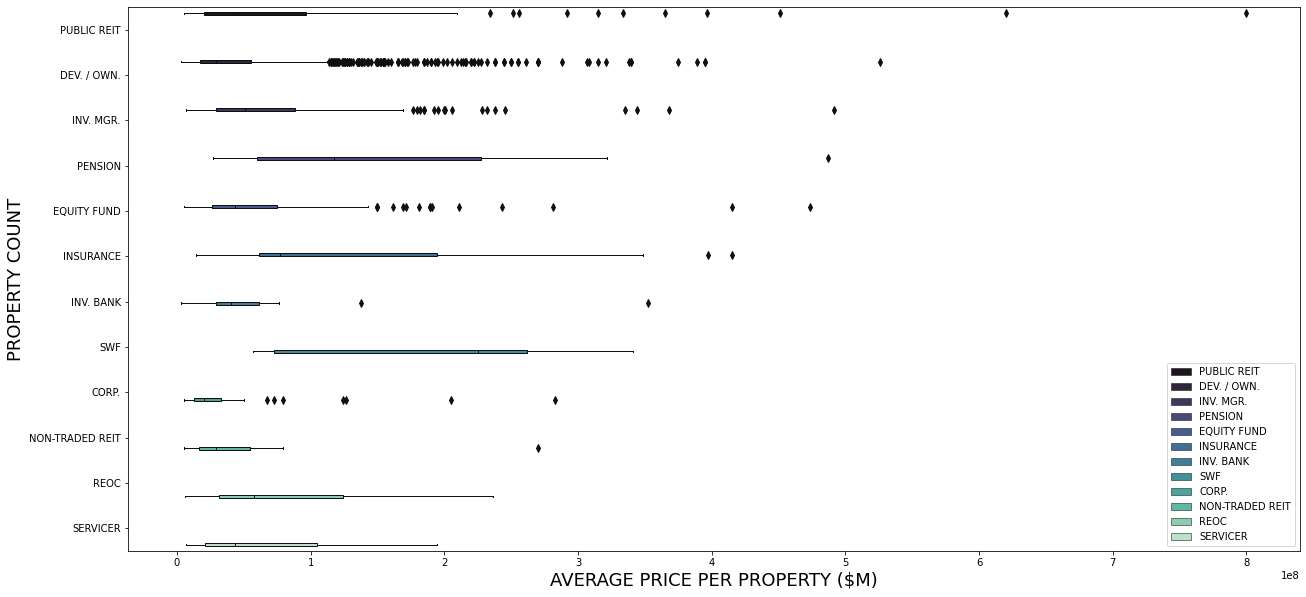

In [61]:
### TBU INVESTOR CHART - TBU DESCRIPTION

all_investor_idx_price = all_investor_idx.sort_values(by = 'TTL_AVG_PRICE', ascending = False)

plt.figure(figsize = (21, 10))
sns.boxplot(data = all_investor_idx_price, x = 'TTL_AVG_PRICE', y = 'INV_TYPE', hue = 'INV_TYPE', palette = "mako", linewidth = 1)
#plt.title('AVERAGE PROPERTY PRICE BY INVESTOR TYPE', fontsize = 24)
plt.xlabel('AVERAGE PRICE PER PROPERTY ($M)', fontsize = 18)
plt.ylabel('PROPERTY COUNT', fontsize = 18)
plt.legend(loc = "best")
plt.savefig('/drive/My Drive/Colab Notebooks/capstone/images/avg_price_boxplot.png');

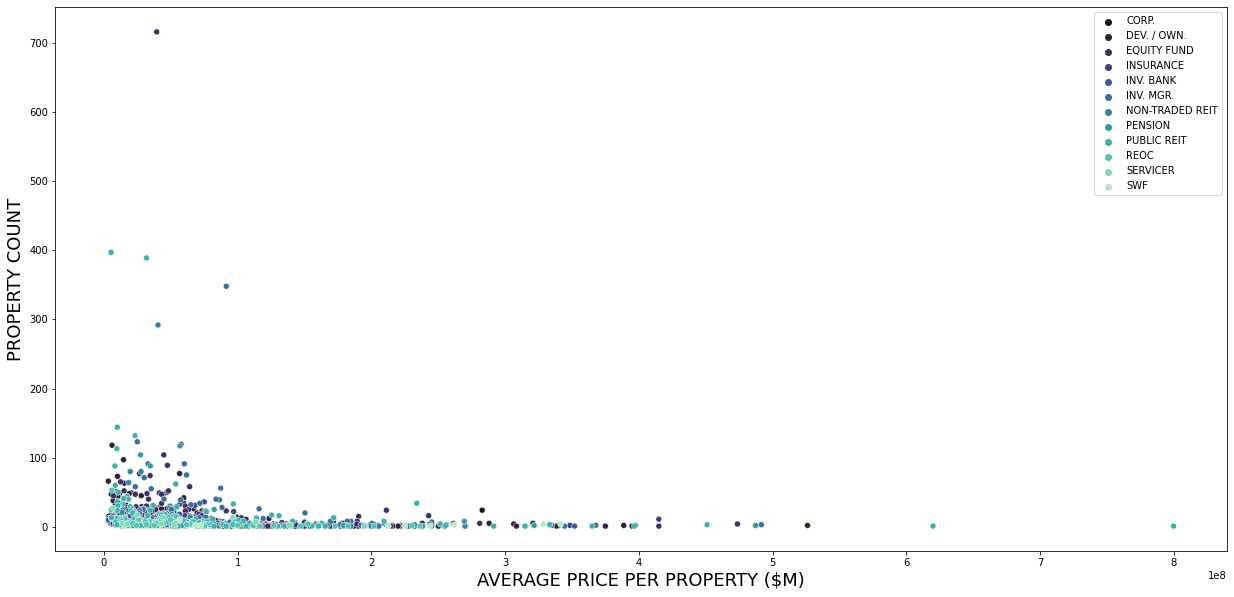

In [64]:
### TBU INVESTOR CHART - TBU DESCRIPTION
plt.figure(figsize = (21, 10))
sns.scatterplot(data = all_investor_idx, x = 'TTL_AVG_PRICE', y = 'TTL_PROPS', hue = 'INV_TYPE', palette = "mako")
#plt.title('AVERAGE PROPERTY PRICE BY INVESTOR TYPE', fontsize = 24)
plt.xlabel('AVERAGE PRICE PER PROPERTY ($MM)', fontsize = 18)
plt.ylabel('PROPERTY COUNT', fontsize = 18)
plt.legend(loc = "best")
plt.savefig('/drive/My Drive/Colab Notebooks/capstone/images/avg_price_scatterplot.png');

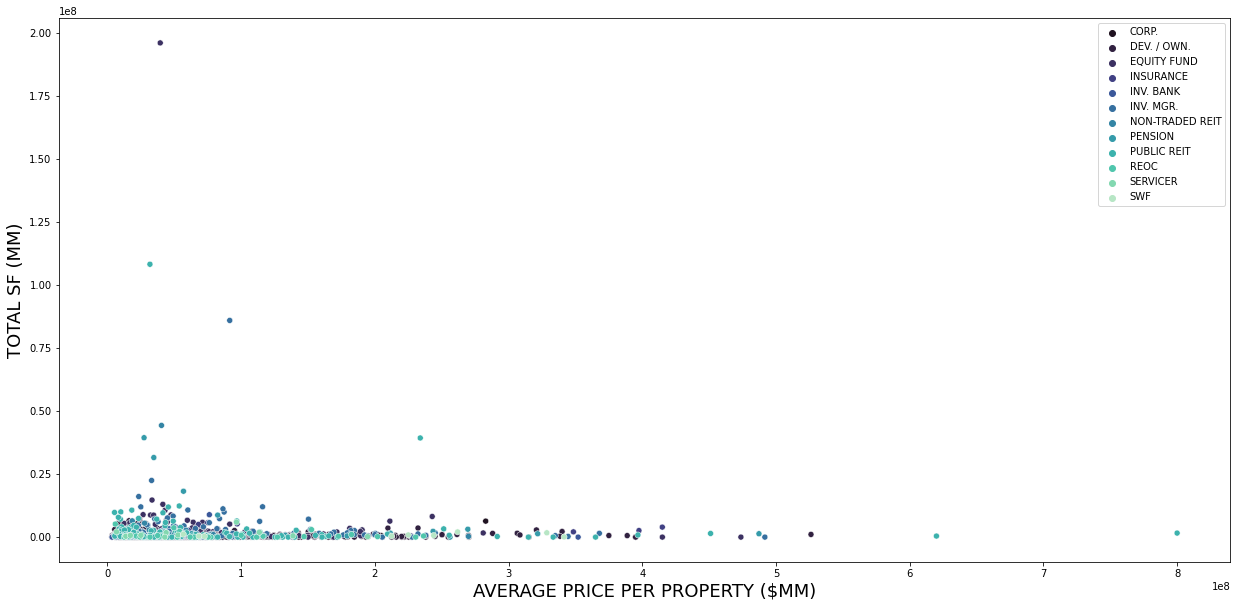

In [101]:
### TBU INVESTOR CHART - TBU DESCRIPTION
plt.figure(figsize = (21, 10))
sns.scatterplot(data = all_investor_idx, x = 'TTL_AVG_PRICE', y = 'TTL_SF', hue = 'INV_TYPE', palette = "mako")
#plt.title('AVERAGE PROPERTY PRICE BY INVESTOR TYPE', fontsize = 24)
plt.xlabel('AVERAGE PRICE PER PROPERTY ($MM)', fontsize = 18)
plt.ylabel('TOTAL SF (MM)', fontsize = 18)
plt.legend(loc = "best")
plt.savefig('/drive/My Drive/Colab Notebooks/capstone/images/avg_price_sf_scatterplot.png');

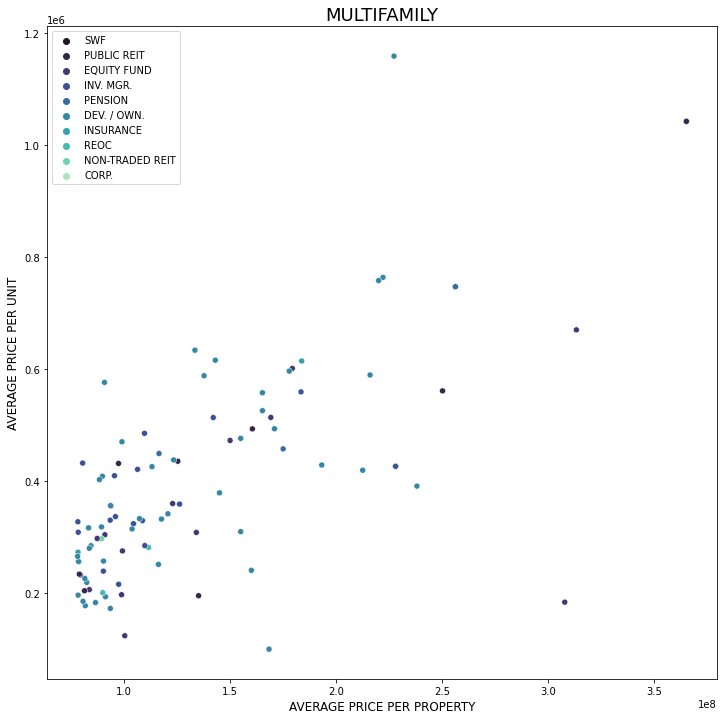

In [129]:
### TRADING VOLUME BY TICKER - Trailing 1Yr - by ticker
top_100_mf_props = all_investor_idx.sort_values(by = 'MF_AVG_PRICE', ascending = False)[:100]
plt.figure(figsize = (12, 12))
sns.scatterplot(data = top_100_mf_props, x = 'MF_AVG_PRICE', y = 'MF_AVG_PPU', hue = 'INV_TYPE', palette = "mako")
plt.title('MULTIFAMILY', fontsize = 18)
plt.xlabel('AVERAGE PRICE PER PROPERTY', fontsize = 12)
plt.ylabel('AVERAGE PRICE PER UNIT', fontsize = 12)
plt.legend(loc = "best");
plt.savefig('/drive/My Drive/Colab Notebooks/capstone/images/ticker_trailing1yr_vol.png')